In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#le nom du personne n'a aucun influence sur la vie du personne
df.drop('Name',axis=1,inplace=True)

In [9]:
df.shape

(891, 11)

In [10]:
#Dans le dernier notebook on obtient un accuracy_score de 0.79
#on va essayer d'améliorer

In [11]:
df.drop('PassengerId',axis=1,inplace=True)

In [12]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
#puisque les données de petit taille on va produire d'autre données pour égaliser le résultat du  classe 'Survived'

In [14]:
df.shape

(891, 10)

In [15]:
train =df.copy()

In [16]:
from imblearn.over_sampling import SMOTE

count_class_0, count_class_1 = train.Survived.value_counts()

# divide by class
train_class_0 = train[train['Survived'] == 0]
train_class_1 = train[train['Survived'] == 1]

Random over-sampling:
1    549
0    549
Name: Survived, dtype: int64


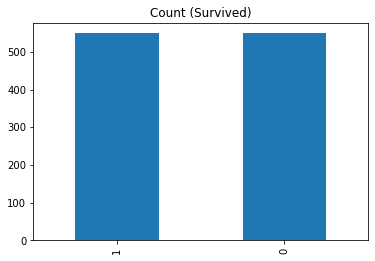

In [17]:
train_class_1_over = train_class_1.sample(count_class_0, replace=True)
train_test_over = pd.concat([train_class_0, train_class_1_over], axis=0)

print('Random over-sampling:')
print(train_test_over.Survived.value_counts())

train_test_over.Survived.value_counts().plot(kind='bar', title='Count (Survived)');


In [18]:
train_test_over.shape

(1098, 10)

In [19]:
train1 = train_test_over

In [20]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,0,3,male,2.0,3,1,349909,21.0750,NaN,S


In [21]:
train1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1098.000000,1098.000000,876.000000,1098.000000,1098.000000,1098.000000
mean,0.500000,2.217668,29.966998,0.501821,0.389800,36.376062
std,0.500228,0.867197,14.538471,1.057377,0.797195,55.530391
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.029200
50%,0.500000,3.000000,29.000000,0.000000,0.000000,16.050000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,39.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 307
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1098 non-null   int64  
 1   Pclass    1098 non-null   int64  
 2   Sex       1098 non-null   object 
 3   Age       876 non-null    float64
 4   SibSp     1098 non-null   int64  
 5   Parch     1098 non-null   int64  
 6   Ticket    1098 non-null   object 
 7   Fare      1098 non-null   float64
 8   Cabin     306 non-null    object 
 9   Embarked  1089 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 94.4+ KB


In [23]:
train1.Age.fillna(train1.Age.mean(),inplace=True)

In [24]:
train1['Age'] = train1['Age'].astype('int64')

In [25]:
from sklearn.preprocessing import LabelEncoder
columns_to_Encode = ['Ticket','Sex']
le = LabelEncoder()
for each in columns_to_Encode:
    train1[each] = le.fit_transform(train1[each])

In [26]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22,1,0,496,7.2500,NaN,S
4,0,3,1,35,0,0,445,8.0500,NaN,S
5,0,3,1,29,0,0,256,8.4583,NaN,Q
6,0,1,1,54,0,0,78,51.8625,E46,S
7,0,3,1,2,3,1,370,21.0750,NaN,S


In [27]:
train1['Fare'] = train1['Fare'].astype('int64')

In [28]:
train1['Embarked'].value_counts()

S    767
C    223
Q     99
Name: Embarked, dtype: int64

In [29]:
train1['Embarked'] = train1['Embarked'].replace({'S' : 0 , 'C' : 1 , 'Q' : 2})

In [30]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22,1,0,496,7,NaN,0.0
4,0,3,1,35,0,0,445,8,NaN,0.0
5,0,3,1,29,0,0,256,8,NaN,2.0
6,0,1,1,54,0,0,78,51,E46,0.0
7,0,3,1,2,3,1,370,21,NaN,0.0


In [31]:
import random

In [32]:
train1['Embarked'] = train1['Embarked'].fillna(value=random.randint(0,2))

In [33]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 307
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1098 non-null   int64  
 1   Pclass    1098 non-null   int64  
 2   Sex       1098 non-null   int64  
 3   Age       1098 non-null   int64  
 4   SibSp     1098 non-null   int64  
 5   Parch     1098 non-null   int64  
 6   Ticket    1098 non-null   int64  
 7   Fare      1098 non-null   int64  
 8   Cabin     306 non-null    object 
 9   Embarked  1098 non-null   float64
dtypes: float64(1), int64(8), object(1)
memory usage: 94.4+ KB


In [34]:
train1['Embarked'] = train1['Embarked'].astype('int64')

In [35]:
train1['Cabin'].value_counts().head(15)

D33        10
D35        10
B28         9
B96 B98     6
E24         6
C68         6
G6          6
B35         6
C7          5
F33         5
E121        5
F4          5
C22 C26     5
C65         5
D           5
Name: Cabin, dtype: int64

In [36]:
train1['Cabin'].nunique()

135

In [37]:
train1['Cabin'].unique()

array([nan, 'E46', 'C23 C25 C27', 'B30', 'C83', 'F G73', 'E31', 'A5',
       'D26', 'C110', 'B58 B60', 'C123', 'B86', 'F2', 'B19', 'A7', 'C49',
       'A32', 'G6', 'C78', 'C87', 'E67', 'B94', 'C118', 'A19', 'D',
       'C22 C26', 'C124', 'C91', 'C2', 'T', 'C128', 'C82', 'E44', 'C111',
       'E38', 'E63', 'A14', 'B37', 'C30', 'C65', 'D46', 'C95', 'B38',
       'C86', 'A10', 'D50', 'D48', 'E58', 'B71', 'C68', 'F G63', 'C46',
       'B22', 'D30', 'E77', 'F38', 'D6', 'B82 B84', 'A36', 'B102', 'A24',
       'B51 B53 B55', 'B73', 'C93', 'D9', 'E8', 'C106', 'C7', 'D35',
       'D49', 'C103', 'E33', 'D33', 'F4', 'D47', 'C101', 'E36', 'B28',
       'E25', 'B20', 'C52', 'E17', 'D45', 'B49', 'F33', 'D37', 'C90',
       'D36', 'E101', 'B42', 'C70', 'D28', 'C45', 'E24', 'E49', 'D10 D12',
       'C50', 'E10', 'B77', 'B96 B98', 'E50', 'C126', 'B3', 'E12', 'C32',
       'B41', 'F E69', 'A31', 'B18', 'E121', 'B5', 'C99', 'D19', 'E68',
       'C104', 'D17', 'C85', 'B50', 'A23', 'D11', 'C125', 'C47', 'B

In [38]:
#on doit trouver une solution pour cette derniére colonne
train2 = train1.copy()

In [39]:
train2['Cabin'] = train2['Cabin'].fillna(value = 'mS')

In [40]:
train2['Cabin'].unique()

array(['mS', 'E46', 'C23 C25 C27', 'B30', 'C83', 'F G73', 'E31', 'A5',
       'D26', 'C110', 'B58 B60', 'C123', 'B86', 'F2', 'B19', 'A7', 'C49',
       'A32', 'G6', 'C78', 'C87', 'E67', 'B94', 'C118', 'A19', 'D',
       'C22 C26', 'C124', 'C91', 'C2', 'T', 'C128', 'C82', 'E44', 'C111',
       'E38', 'E63', 'A14', 'B37', 'C30', 'C65', 'D46', 'C95', 'B38',
       'C86', 'A10', 'D50', 'D48', 'E58', 'B71', 'C68', 'F G63', 'C46',
       'B22', 'D30', 'E77', 'F38', 'D6', 'B82 B84', 'A36', 'B102', 'A24',
       'B51 B53 B55', 'B73', 'C93', 'D9', 'E8', 'C106', 'C7', 'D35',
       'D49', 'C103', 'E33', 'D33', 'F4', 'D47', 'C101', 'E36', 'B28',
       'E25', 'B20', 'C52', 'E17', 'D45', 'B49', 'F33', 'D37', 'C90',
       'D36', 'E101', 'B42', 'C70', 'D28', 'C45', 'E24', 'E49', 'D10 D12',
       'C50', 'E10', 'B77', 'B96 B98', 'E50', 'C126', 'B3', 'E12', 'C32',
       'B41', 'F E69', 'A31', 'B18', 'E121', 'B5', 'C99', 'D19', 'E68',
       'C104', 'D17', 'C85', 'B50', 'A23', 'D11', 'C125', 'C47', '

In [41]:
le = LabelEncoder()
train2['Cabin'] = le.fit_transform(train2['Cabin'])

In [42]:
train2['Cabin'].nunique()

136

In [43]:
train2['Cabin'].unique()

array([135, 117,  54,  19,  71, 128, 111,   9,  89,  44,  30,  47,  37,
       129,  14,  10,  60,   7, 133,  69,  74, 122,  38,  46,   2,  81,
        53,  48,  76,  52, 134,  51,  70, 116,  45, 115, 121,   1,  21,
        55,  65,  97,  79,  22,  73,   0, 101,  99, 120,  32,  66, 127,
        58,  16,  91, 124, 131, 102,  36,   8,  12,   4,  28,  33,  78,
       103, 125,  43,  67,  93, 100,  41, 112,  92, 132,  98,  40, 114,
        17, 110,  15,  62, 108,  96,  25, 130,  95,  75,  94, 105,  24,
        68,  90,  57, 109, 118,  82,  61, 104,  34,  39, 119,  50,  18,
       106,  56,  23, 126,   6,  13, 107,  26,  80,  86, 123,  42,  85,
        72,  27,   3,  83,  49,  59,  11,  35,  88, 113,  20,  77,  87,
        31,  84,  64,   5,  63,  29])

In [44]:
train2['Cabin'].value_counts()

135    792
92      10
93      10
17       9
109      6
      ... 
72       1
73       1
74       1
76       1
0        1
Name: Cabin, Length: 136, dtype: int64

In [45]:
#donc l'entier 136 a remplacé la valeur de 'mS'(np.nan précédement)

In [46]:
train2['Cabin'].shape

(1098,)

In [47]:
train2['Cabin'].max()

135

In [48]:
l = train2.shape[0]

In [49]:
col = train2['Cabin']

In [50]:
col = np.array(col)

In [51]:
col

array([135, 135, 135, ...,  33, 135,  65])

In [52]:
len(col)

1098

In [53]:
for k in range (len(col)):
  if col[k] == 136 :
    col[k] = random.randint(0,135)

In [54]:
col

array([135, 135, 135, ...,  33, 135,  65])

In [55]:
col1 = col.copy()

In [56]:
col1 = pd.DataFrame(col1)

In [57]:
col1

,0
0,135
1,135
2,135
3,117
4,135
...,...
1093,135
1094,135
1095,33
1096,135


In [58]:
col1.shape

(1098, 1)

In [59]:
train2['Cabin'] = col1

In [60]:
train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22,1,0,496,7,135,0
4,0,3,1,35,0,0,445,8,135,0
5,0,3,1,29,0,0,256,8,135,2
6,0,1,1,54,0,0,78,51,135,0
7,0,3,1,2,3,1,370,21,135,0


In [61]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 307
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1098 non-null   int64
 1   Pclass    1098 non-null   int64
 2   Sex       1098 non-null   int64
 3   Age       1098 non-null   int64
 4   SibSp     1098 non-null   int64
 5   Parch     1098 non-null   int64
 6   Ticket    1098 non-null   int64
 7   Fare      1098 non-null   int64
 8   Cabin     1098 non-null   int64
 9   Embarked  1098 non-null   int64
dtypes: int64(10)
memory usage: 94.4 KB


In [62]:
#c'est bien tout va bien maintenant

In [63]:
x = train2.drop('Survived',axis=1)
y = train2['Survived']

In [64]:
#avant ca je vais essayer de comprendre les relations entre les variables

Text(0, 0.5, 'Survived')

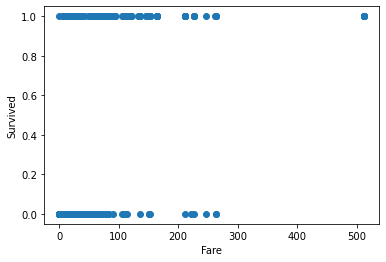

In [65]:
plt.scatter(train2['Fare'],train2['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

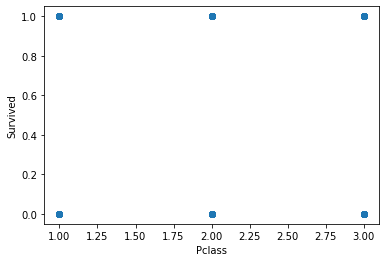

In [66]:
plt.scatter(train2['Pclass'],train2['Survived'])
plt.xlabel('Pclass')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

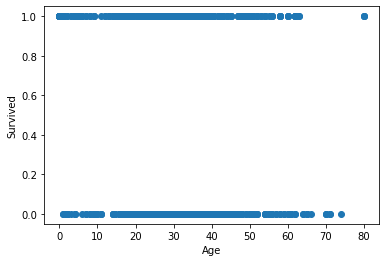

In [67]:
plt.scatter(train2['Age'],train2['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

In [68]:
#qui ont un age > 65 ont été morts

Text(0, 0.5, 'Survived')

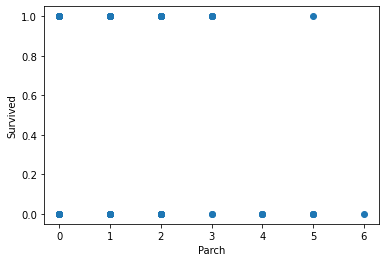

In [69]:
plt.scatter(train2['Parch'],train2['Survived'])
plt.xlabel('Parch')
plt.ylabel('Survived')

In [70]:
train2['Parch'].value_counts()

0    829
1    144
2    108
3      7
5      5
4      4
6      1
Name: Parch, dtype: int64

Text(0, 0.5, 'Survived')

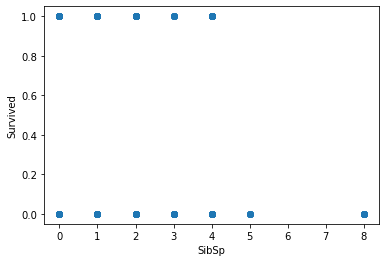

In [71]:
plt.scatter(train2['SibSp'],train2['Survived'])
plt.xlabel('SibSp')
plt.ylabel('Survived')

In [72]:
train2['SibSp'].value_counts()

0    757
1    253
2     35
4     24
3     17
8      7
5      5
Name: SibSp, dtype: int64

In [73]:
#13 personnes qui ont un 'SibSp' => 5 ont été morts

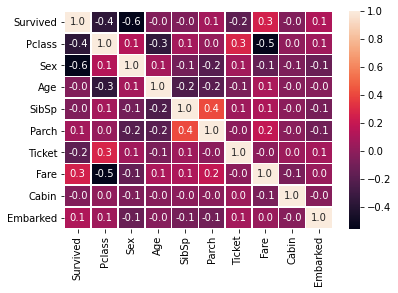

In [74]:
sns.heatmap(train2.corr(), annot=True, fmt=".1f", linewidths=.5);

In [75]:
#il était attendu que la variable "Cabin" n'a pas d'influence sur la classe 'Survived' puisqu'il posséde trop de valeurs nulles

In [76]:
train2.drop('Cabin',axis=1,inplace=True)

In [77]:
#de méme pour l'age
train2.drop('Age',axis=1,inplace=True)

In [78]:
#on doit réfléchier d'une autre facon pour obtenir des bons résultat pour cette probléme

In [79]:
#malgré ca , on va continuer avec les données obtenus aprés tous ces modifications

In [80]:
x = train2.drop('Survived',axis=1)
y = train2['Survived']

In [81]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [82]:
#modéle1

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy',n_jobs=-1)

In [85]:
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(pred,y_test)

0.8472727272727273

In [88]:
#c'est bien il ya un avancement dans le résultat par rapport au résultat précédememnt obtenu

In [89]:
#on va essayer avec d'autre modéle

In [90]:
#modéle2

In [91]:
import lightgbm as lgb
trn_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_test, label=y_test)

In [92]:
weight = 10
param = { 'num_leaves': 80,
    'boost': 'gbdt',
    'learning_rate': 0.03,
    'metric':'binary_logloss',
    'scale_pos_weight': round(weight, 1),
    
 
    
    'objective': 'binary',
    'random_state': 42,
    
}

lgb_model = lgb.train(param, trn_data, 5000, valid_sets = [trn_data, val_data], 
                      verbose_eval=200, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.377006	valid_1's binary_logloss: 0.564291
[400]	training's binary_logloss: 0.221362	valid_1's binary_logloss: 0.487582
[600]	training's binary_logloss: 0.157522	valid_1's binary_logloss: 0.492071
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.205675	valid_1's binary_logloss: 0.482369


In [93]:
#selon l'erreur je pense qu'il nya pas un avancement % résultat précédente

In [94]:
pred = lgb_model.predict(x_test,num_iteration=lgb_model.best_iteration)
threshold = 0.5
pred  = (pred >=threshold)*1
accuracy_score(pred,y_test)

0.8218181818181818

In [95]:
#D'autres modéles

In [96]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train);
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.7890909090909091

In [97]:
#je pense que rfc est meilleur que DecisionTree mais je vais essayer
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',random_state=42)
model.fit(x_train,y_train);
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.8654545454545455

In [98]:
#
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,random_state=42)
model.fit(x_train,y_train);
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.5272727272727272

In [99]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.8981818181818182

In [100]:
#parfait le meilleur modéle jusqu'a maintenant

In [101]:
#on va essayer d'améliorer ces paramétres

In [102]:
#essai1
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [103]:
gsearch1.best_score_ 

0.8626459719142645

In [104]:
gsearch1.best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [105]:
#on va remplacer les meilleurs paramétres obten
model = XGBClassifier( learning_rate =0.1, n_estimators=140, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, max_depth = 5,min_child_weight = 1)

In [106]:
model.fit(x_train,y_train);
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.92

In [107]:
#ilya un avancement

In [109]:
#on va remplacer les meilleurs paramétres obtenu
m = 0
d = 1
for k in range(1,15):
  model = XGBClassifier( learning_rate =0.1, n_estimators=140, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, max_depth = k,min_child_weight = 1)
  model.fit(x_train,y_train);
  pred = model.predict(x_test)
  s = accuracy_score(pred,y_test)
  if s > m:
    m = s
    d = k

In [110]:
d

5

In [111]:
m

0.92

In [112]:
#c'est le meilleur jusqu'a maintenant

In [113]:
#on va remplacer les meilleurs paramétres obtenu
m = 0
d = 1 
for k in range(1,15):
  model = XGBClassifier( learning_rate =0.1, n_estimators=140, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, max_depth = 6,min_child_weight = k)
  model.fit(x_train,y_train);
  pred = model.predict(x_test)
  s = accuracy_score(pred,y_test)
  if s > m:
    m = s
    d = k

In [114]:
m

0.9163636363636364

In [115]:
d

1